In [1]:
from cumc import Box

1.5000000596046448
max_grid_size 15
pressure_thero 4.287340305200131
pressure_thero(r0=d/2) 4.033793428805424


100%|██████████| 1000/1000 [00:19<00:00, 50.76it/s]


1.5001146122813225
update_positions 131072.0 times per step, should be 131072
handle_collisions 32768.0 times per step, should be 32768
cell_states 32768.0 times per step, should be 32768


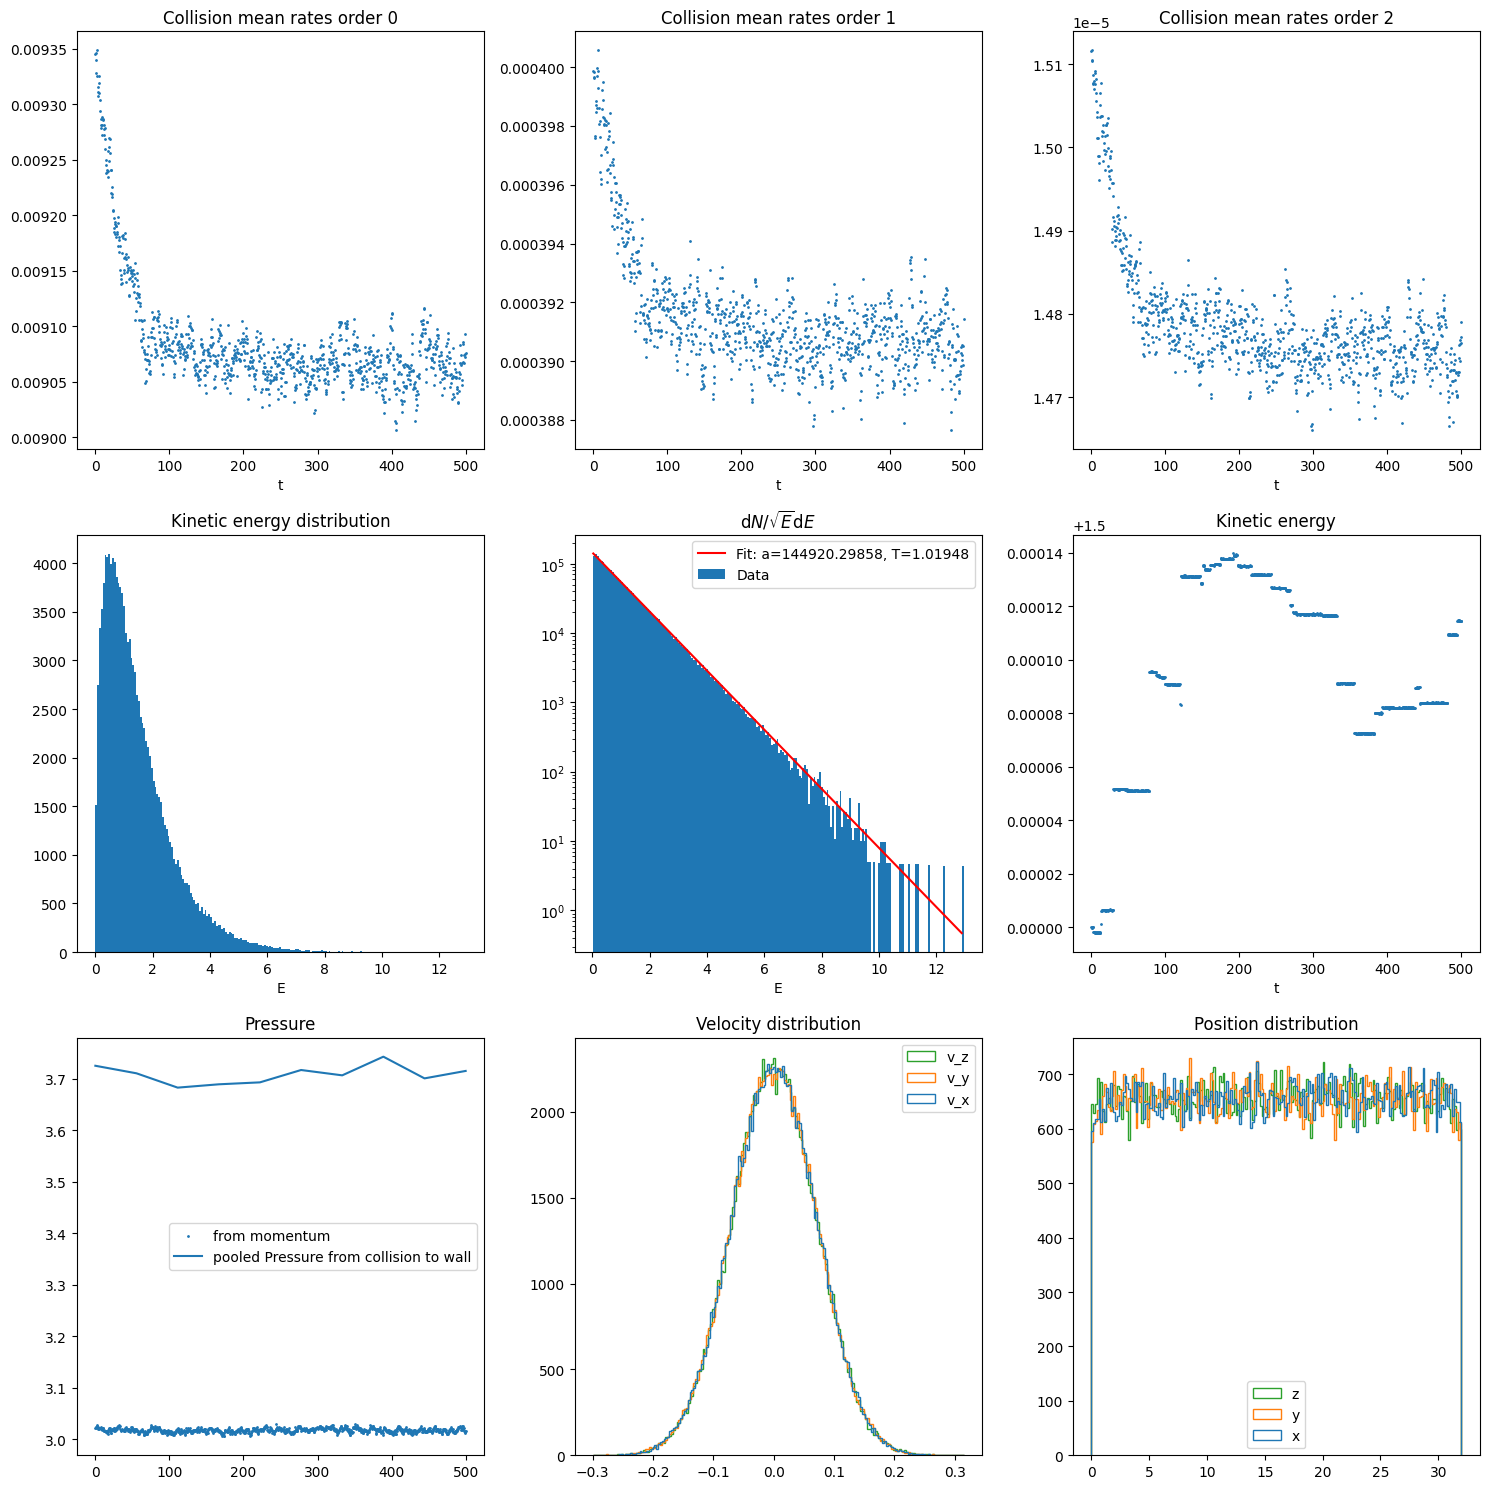

In [10]:
box = Box(box_size=32, stop=500, dt=0.5, T=1, mass=200, d=0.2, bounded=True, n_test=1,order=2)
box.out_plot()

In [11]:
print(len(box.pressures_from_momentum))
sum(box.pressures_from_momentum[-100:])/100

1000


3.017433462043604

1.4999998733401299
max_grid_size 15
pressure_thero 5.169258792093716
pressure_thero(r0=d/2) 4.116388132445947


100%|██████████| 1000/1000 [00:19<00:00, 50.46it/s]


1.4999914914369583
update_positions 131072.0 times per step, should be 131072
handle_collisions 32768.0 times per step, should be 32768
cell_states 32768.0 times per step, should be 32768


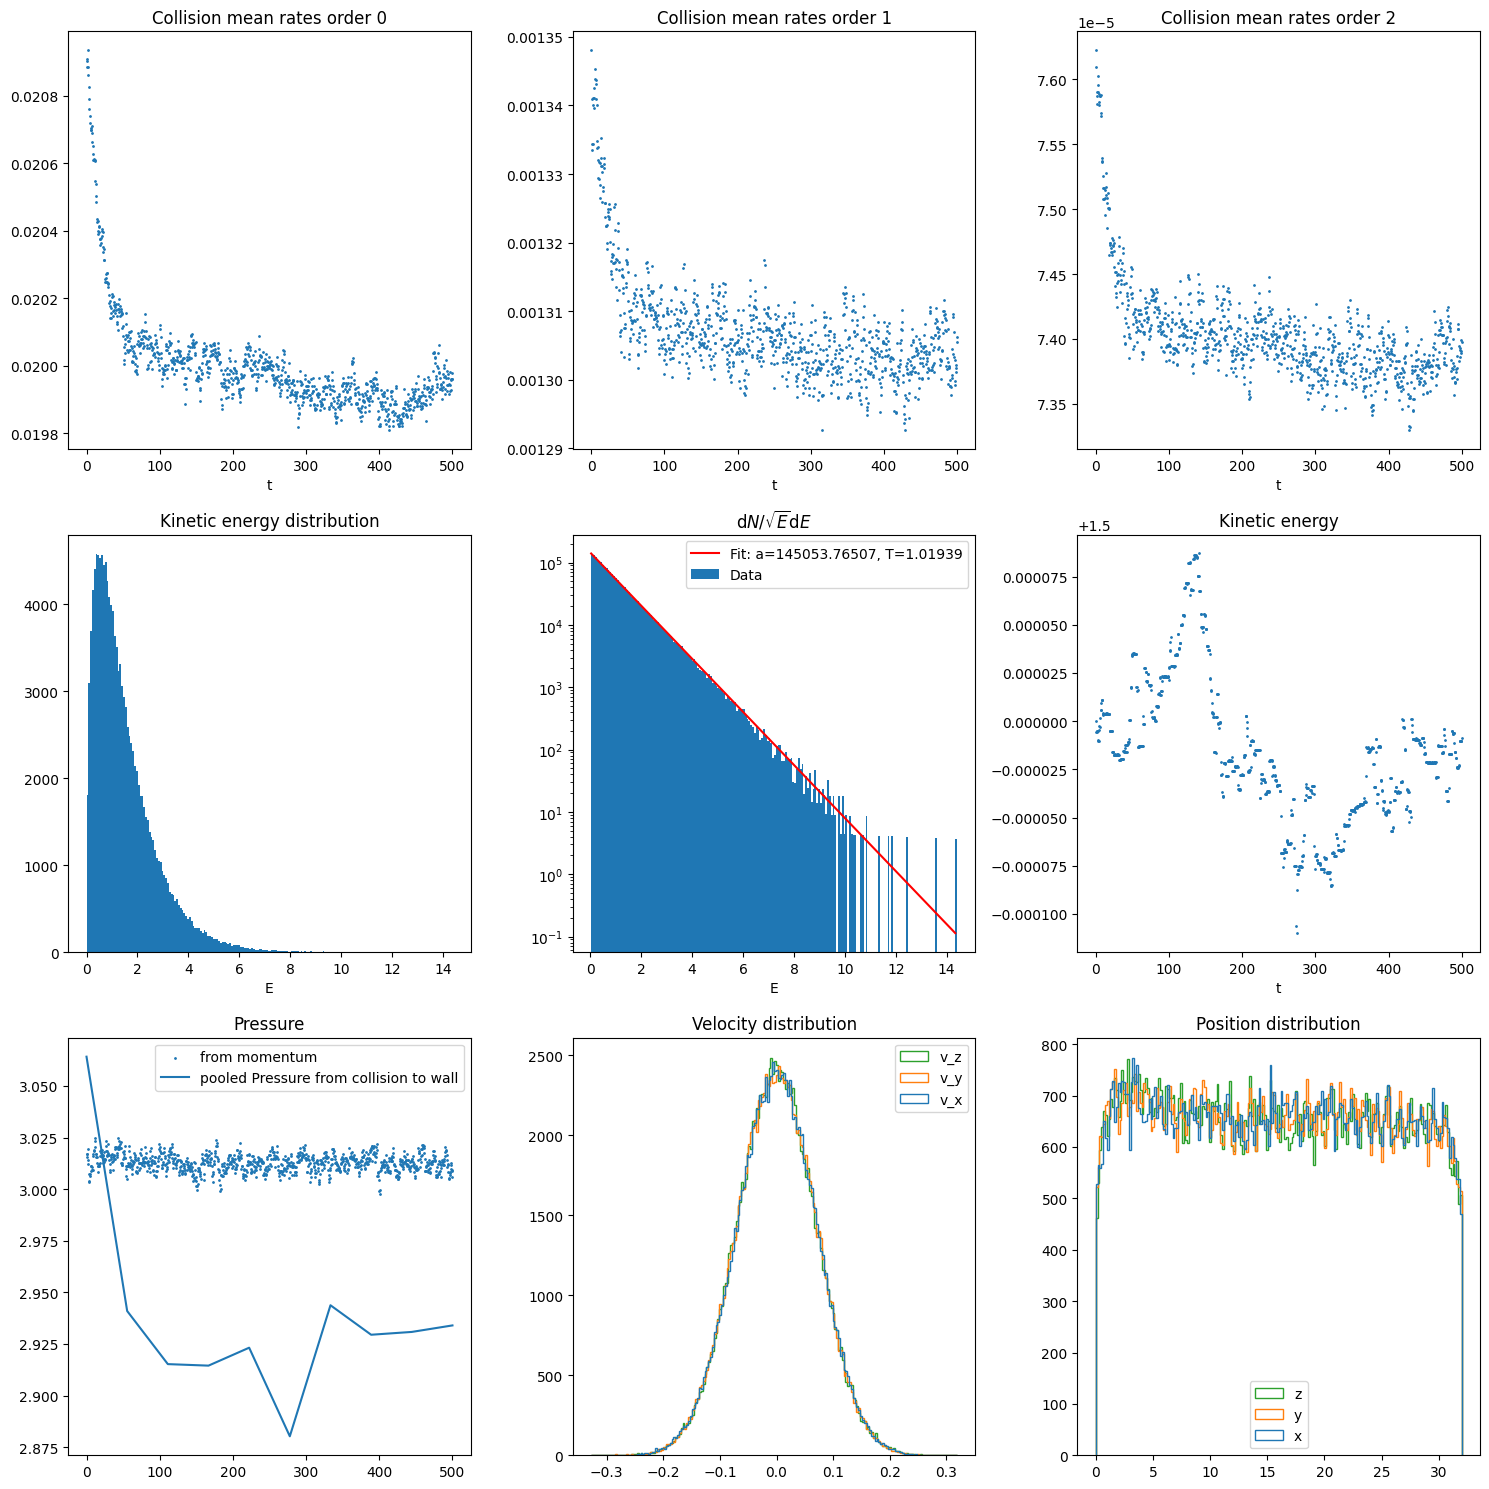

In [12]:
box1 = Box(box_size=32, stop=500, dt=0.5, T=1, mass=200, d=0.3, bounded=True, n_test=1,order=2)
box1.out_plot()

In [13]:
sum(box1.pressures_from_momentum[-100:])/100

3.012507093449433

In [2]:
box1 = Box(box_size=16, stop=100, dt=0.5, T=1, mass=200, d=0.2, bounded=True, n_test=1,order=2)
print(sum(box1.pressures_from_momentum[-100:])/100)
box1.out_plot()

1.4999998733401299
max_grid_size 66
pressure_thero 68.99007208861302
pressure_thero(r0=d/2) 34.29872244160105


 72%|███████▏  | 287/400 [01:53<00:44,  2.53it/s]


KeyboardInterrupt: 

1.4999998733401299
pressure_thero 4.287340305200131
pressure_thero(r0=d/2) 4.033793428805424


100%|██████████| 1000/1000 [00:19<00:00, 51.63it/s]


1.4999628998339176
update_positions 131072.0 times per step, should be 131072
handle_collisions 32768.0 times per step, should be 32768
cell_states 32768.0 times per step, should be 32768


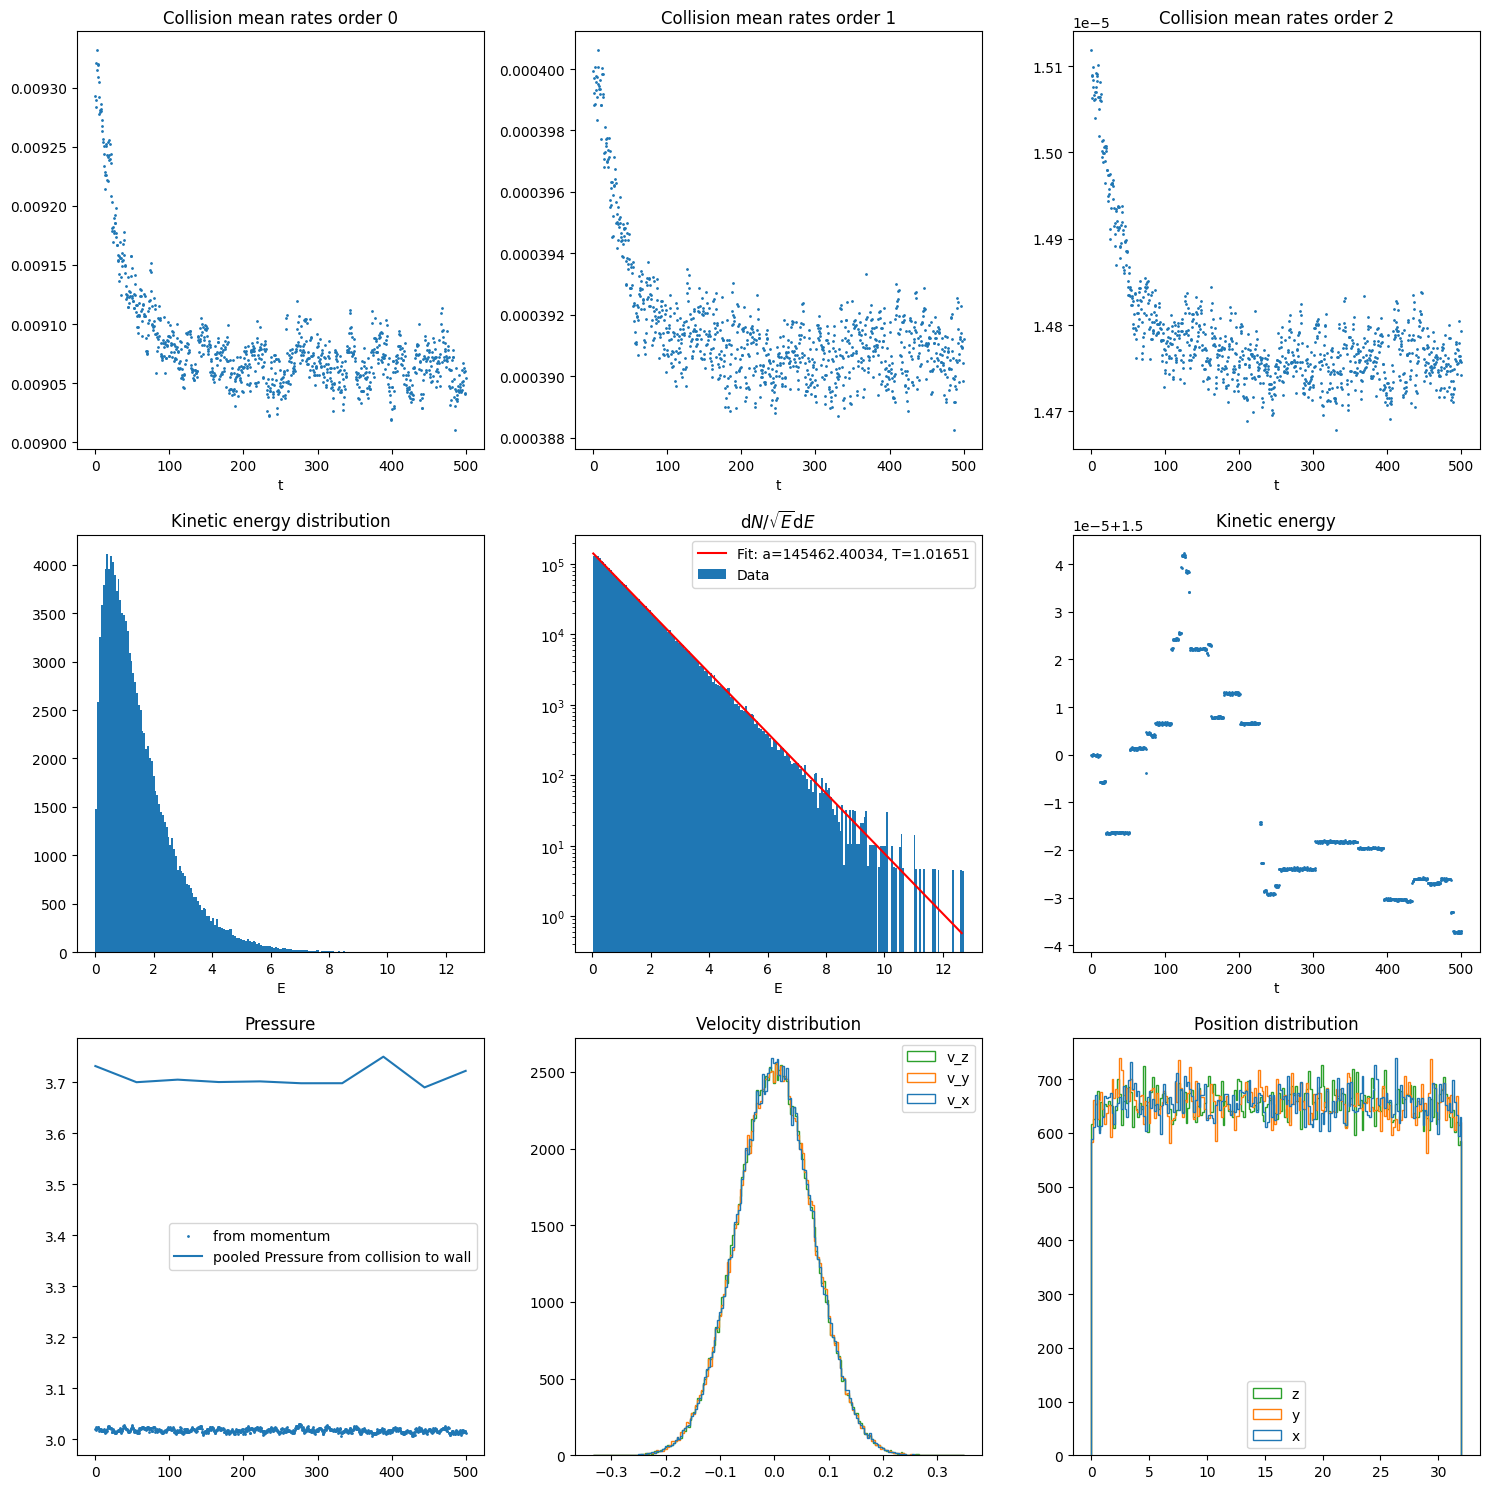

In [7]:
Box(box_size=32, stop=500, dt=0.5, T=1, mass=200, d=0.2, bounded=True, n_test=1,order=2).out_plot()

1.4999999664723873
pressure_thero 5.169258792093716
pressure_thero(r0=d/2) 4.116388132445947


100%|██████████| 5000/5000 [01:37<00:00, 51.48it/s]


1.499952469021082
update_positions 131072.0 times per step, should be 131072
handle_collisions 32768.0 times per step, should be 32768
cell_states 32768.0 times per step, should be 32768


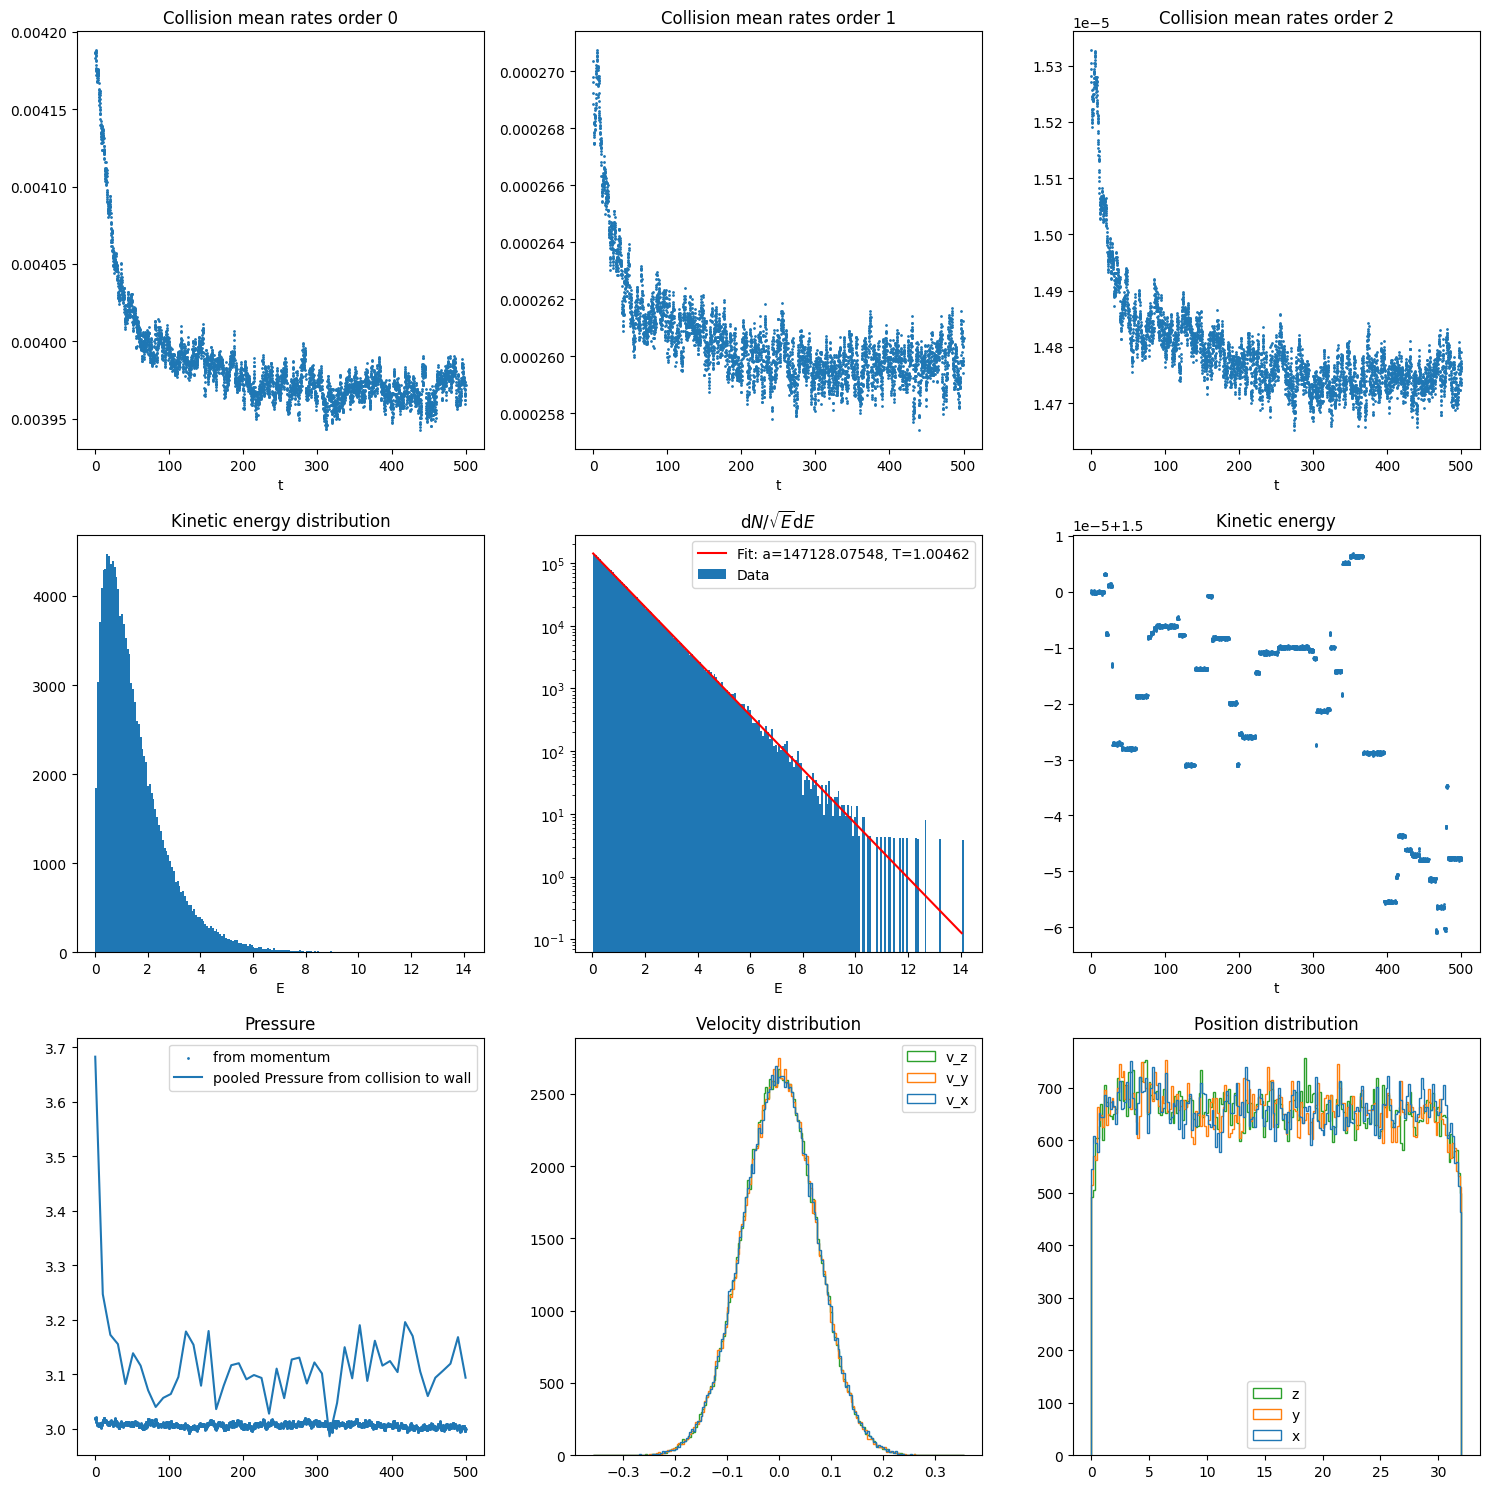

In [2]:
Box(box_size=32, stop=500, dt=0.1, T=1, mass=200, d=0.3, bounded=True, n_test=1,order=2).out_plot()

1.4999998733401299
max_grid_size 15
pressure_thero 4.287340305200131
pressure_thero(r0=d/2) 4.033793428805424


100%|██████████| 10000/10000 [00:29<00:00, 344.13it/s]


1.5011025592684746
update_positions 16384.0 times per step, should be 16384
handle_collisions 4096.0 times per step, should be 4096
cell_states 4096.0 times per step, should be 4096


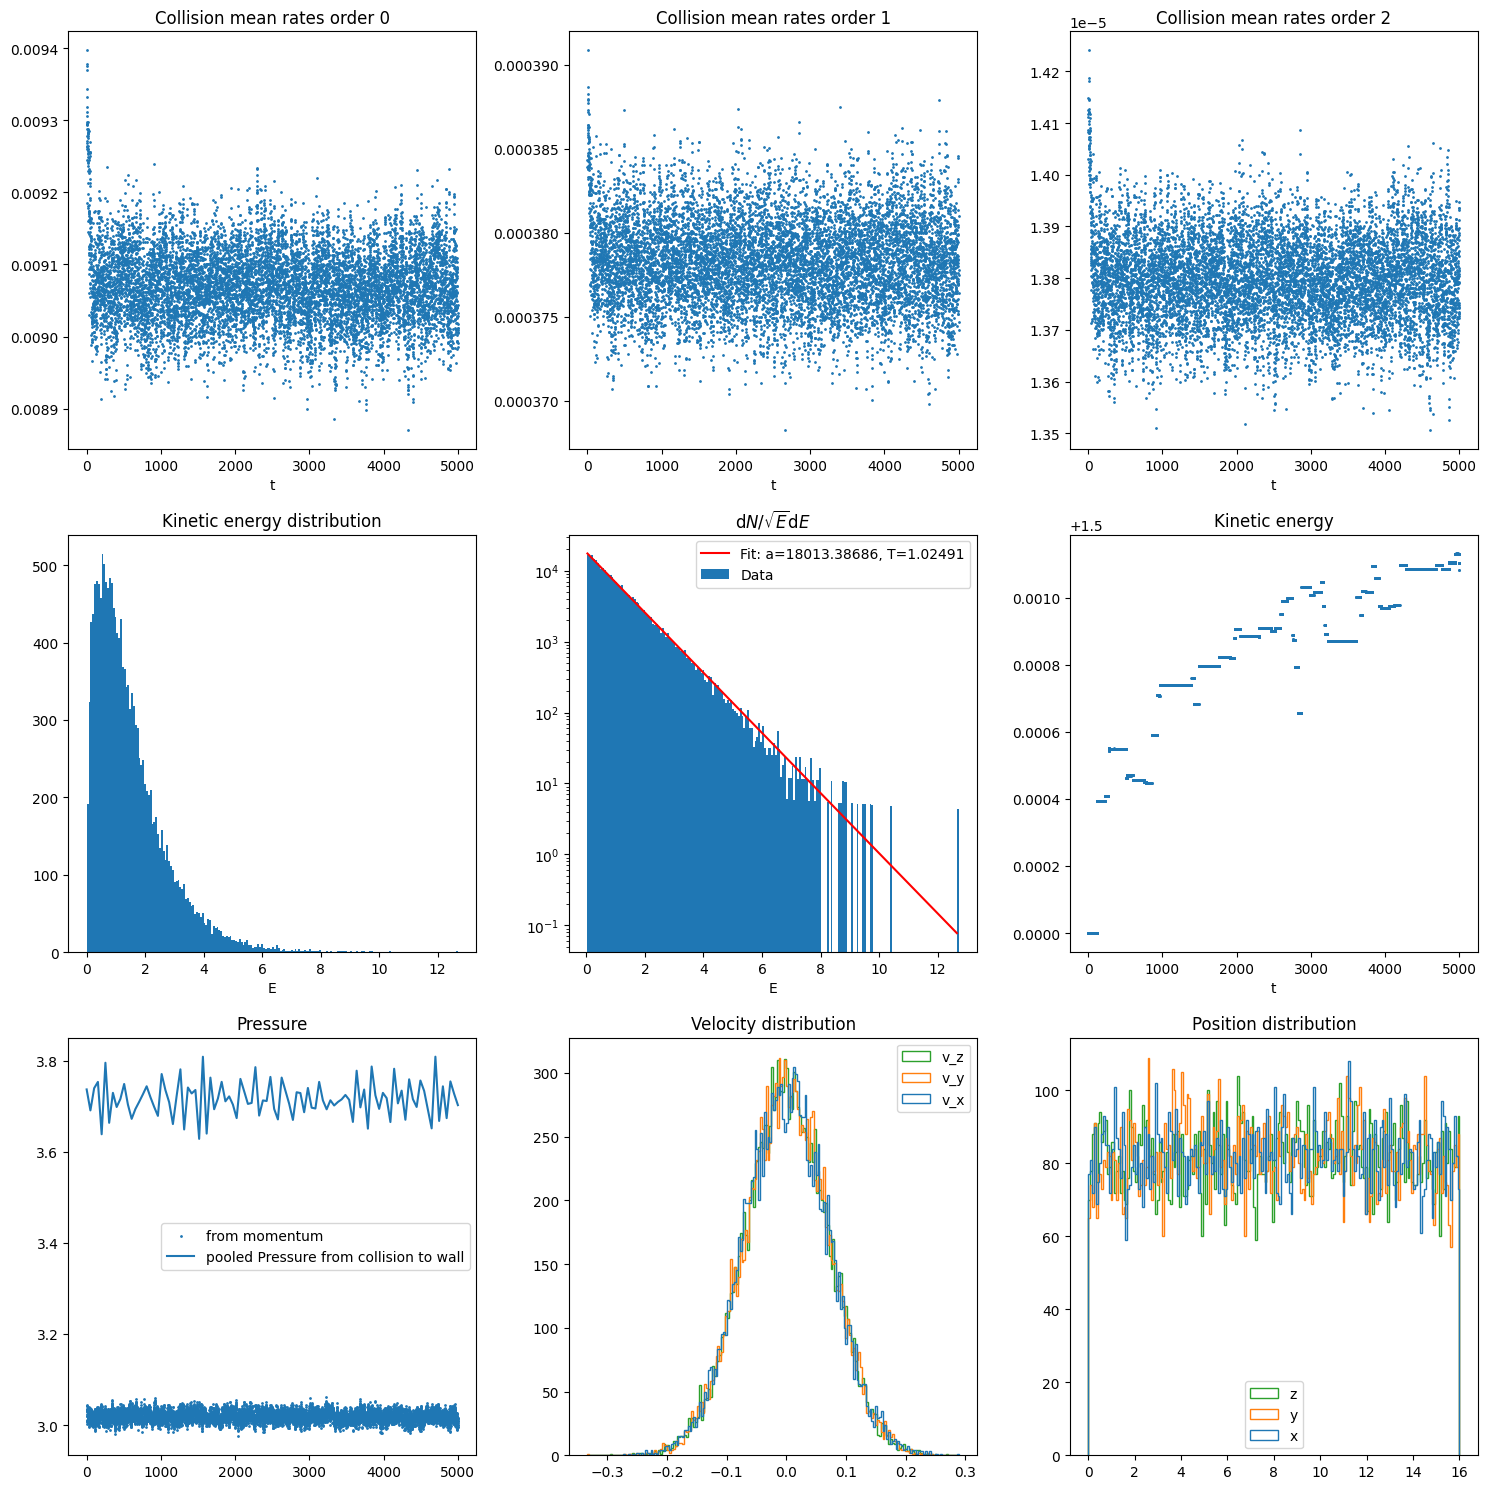

In [3]:
Box(box_size=16, stop=5000, dt=0.5, num_particles=16384, T=1, mass=200, d=0.2, bounded=True, n_test=1,order=2).out_plot()

7.500001788139343
pressure_thero 43.11879505538314
pressure_thero(r0=d/2) 21.436701526000657


100%|██████████| 400/400 [00:45<00:00,  8.86it/s]


7.662162929773331


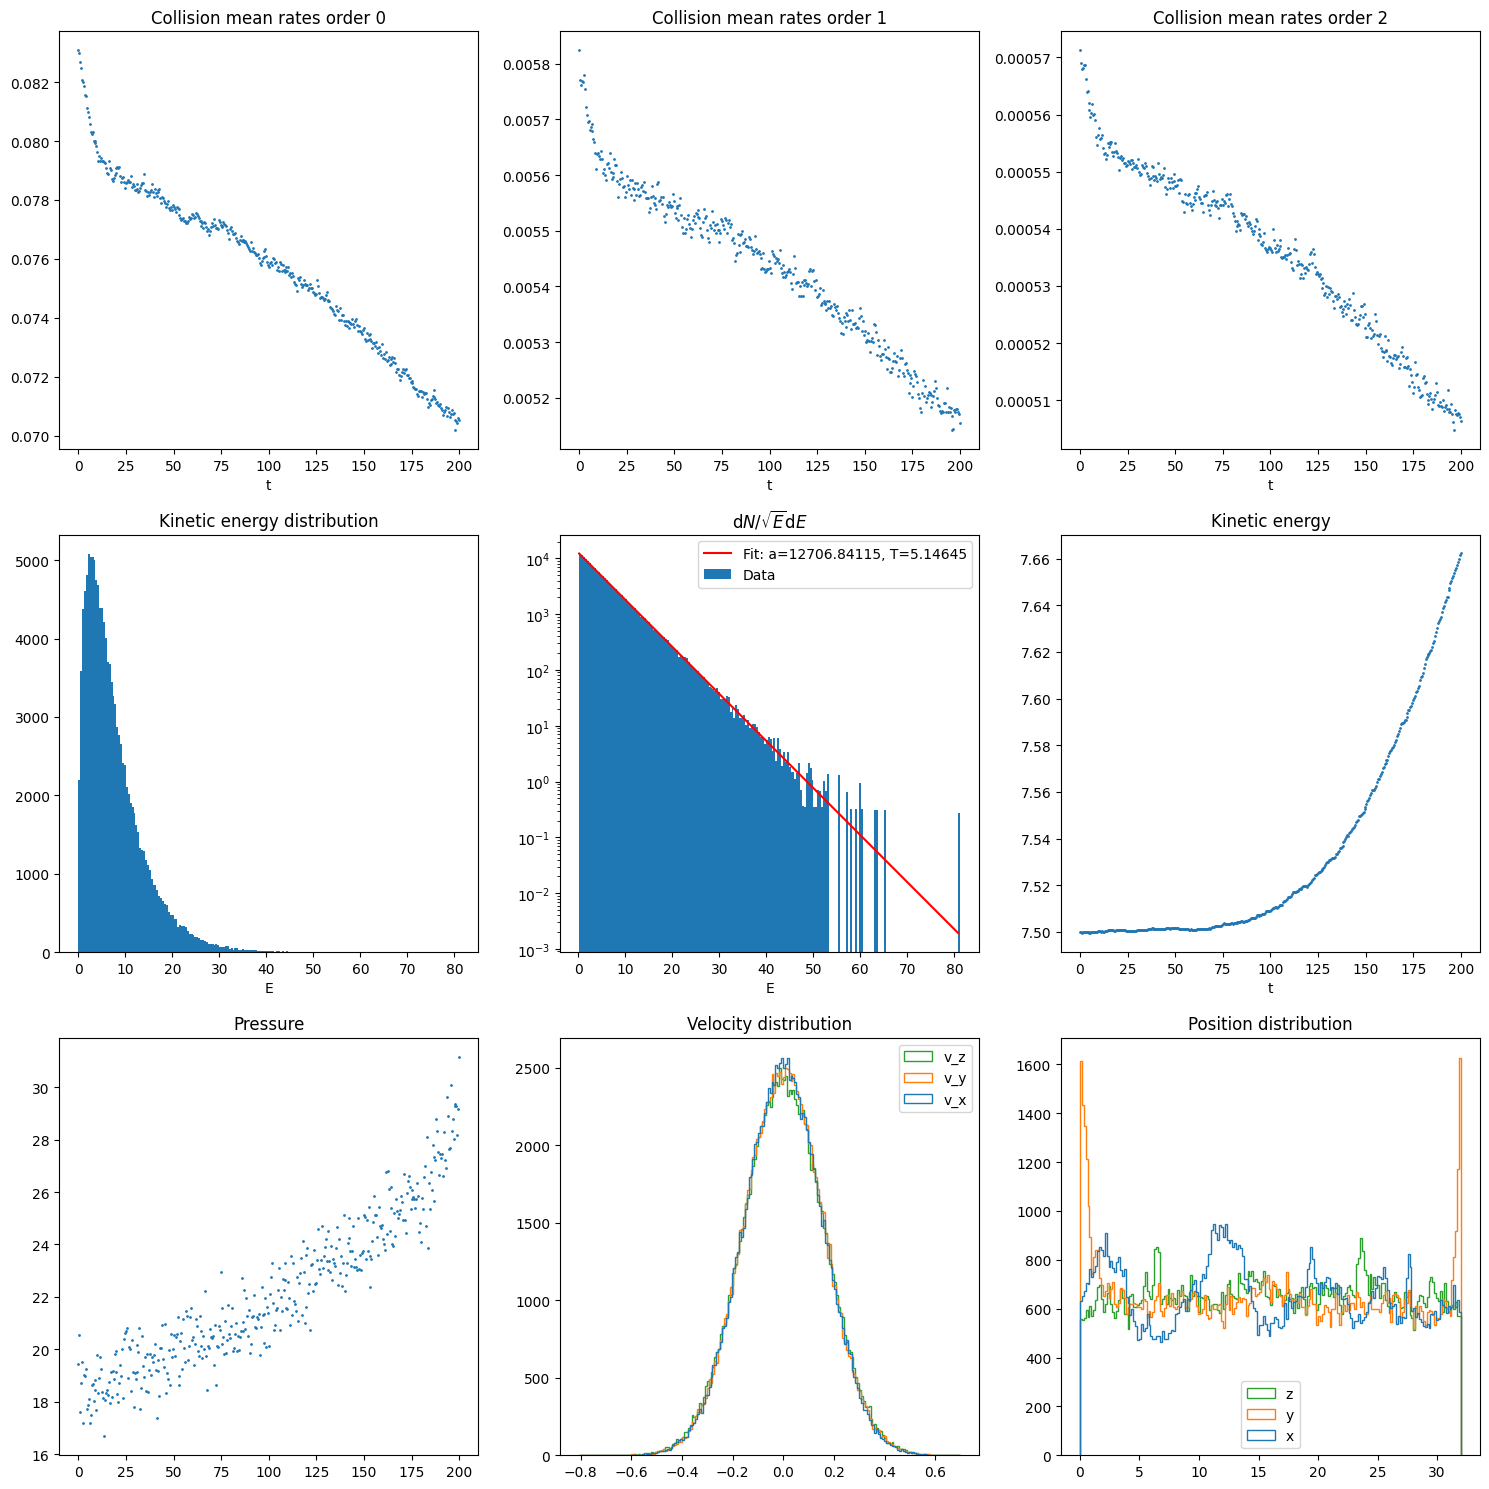

In [7]:
Box(box_size=32, stop=200, dt=0.5, T=5, mass=200, d=0.4, bounded=False, n_test=1,order=2).out_plot()

In [3]:
sum(box.pressures[-1000:])/1000

1.5016455192565918

In [12]:
import numpy as np
box.num_particles * box.T / (box.box_size ** 3 - box.num_particles * 2/3*np.pi*0.4**3/8)

4.287340305200131

In [ ]:
from tqdm import tqdm
import numpy as np
from pycuda import gpuarray

dt=0.2
for _ in tqdm(range(int(20000))):
    pressure = gpuarray.zeros(1, np.float32)
    grid = gpuarray.zeros((box.num_grids, box.max_grid_size), np.int32)
    grid_sizes = gpuarray.zeros(box.num_grids, np.int32)
    collision_rates_o0 = gpuarray.zeros(box.num_grids, np.float32)
    collision_rates_o1 = gpuarray.zeros(box.num_grids, np.float32)
    collision_rates_o2 = gpuarray.zeros(box.num_grids, np.float32)
    box.update_positions(grid, grid_sizes, box.particle_positions, box.particle_velocities, pressure, np.float32(box.box_size), np.int32(box.max_grid_size), np.float32(box.mass), np.float32(dt), np.int32(box.num_particles), np.int32(box.bounded), block=(512,1,1), grid=(box.num_particles//512+1,1))
    pressure *= 2 * box.mass / 6 / box.box_size / box.box_size / dt
    box.pressures.append(pressure.get()[0])
    collision_rand = box.collision_rands[np.random.randint(20)]
    box.handle_collisions(grid, grid_sizes, box.particle_positions, box.particle_velocities, collision_rates_o0, collision_rates_o1, collision_rates_o2, np.float32(box.d), np.int32(box.box_size), np.int32(box.max_grid_size), np.float32(box.mass), np.float32(dt), np.int32(box.num_particles), collision_rand, np.int32(2), np.int32(box.bounded), block=(512,1,1), grid=(box.num_grids//512+1,1))
    box.collision_mean_rates_o0.append(collision_rates_o0.get().mean())
    box.collision_mean_rates_o1.append(collision_rates_o1.get().mean())
    box.collision_mean_rates_o2.append(collision_rates_o2.get().mean())
    Ek = 0.5 * box.mass * (box.particle_velocities.get() ** 2).sum() / box.num_particles
    box.Eks.append(Ek)

100%|██████████| 20000/20000 [06:13<00:00, 53.58it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


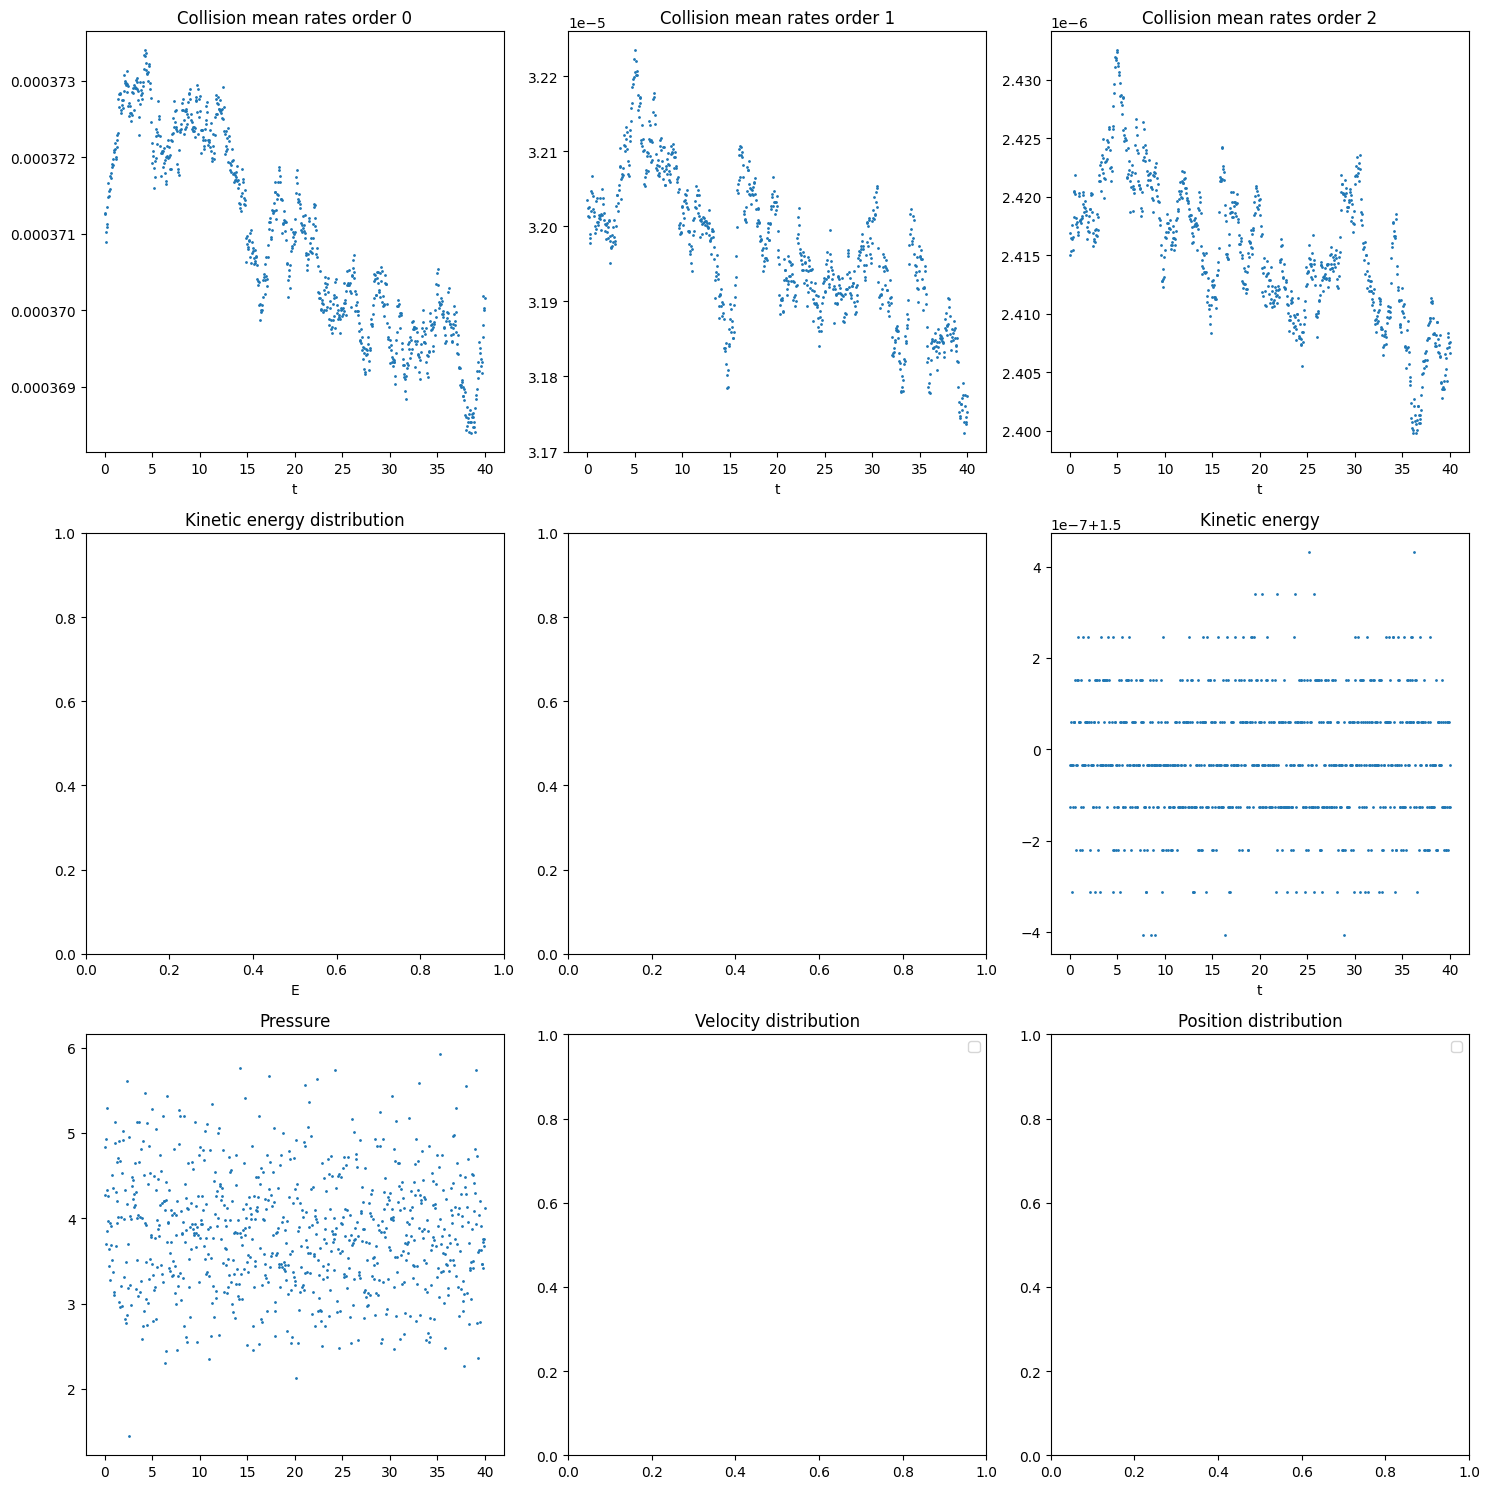

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[0,0].scatter(np.linspace(0, box.stop, len(box.collision_mean_rates_o0)), box.collision_mean_rates_o0, s=1)
ax[0,0].set_title("Collision mean rates order 0")
ax[0,0].set_xlabel("t")
ax[0,1].scatter(np.linspace(0, box.stop, len(box.collision_mean_rates_o1)), box.collision_mean_rates_o1, s=1)
ax[0,1].set_title("Collision mean rates order 1")
ax[0,1].set_xlabel("t")
ax[0,2].scatter(np.linspace(0, box.stop, len(box.collision_mean_rates_o2)), box.collision_mean_rates_o2, s=1)
ax[0,2].set_title("Collision mean rates order 2")
ax[0,2].set_xlabel("t")
# ax[1,0].hist(0.5 * box.mass * (box.particle_velocities.get() ** 2).sum(-1), bins=200)
ax[1,0].set_title("Kinetic energy distribution")
ax[1,0].set_xlabel("E")
# particle_energies = 0.5 * box.mass * (box.particle_velocities.get() ** 2).sum(-1)
def exp_func(x, a, temp):
    return a * np.exp(-x/temp)
# hist, bins = np.histogram(particle_energies, bins=200)
# bin_widths = np.diff(bins)
# bin_centers = (bins[:-1] + bins[1:]) / 2
# norm_factor = bin_widths * np.sqrt(bin_centers)
# normalized_hist = hist / norm_factor
# popt, pcov = curve_fit(exp_func, bin_centers, normalized_hist, bounds=([0, 0], [1e8, 2*box.T]))
# fit_values = exp_func(bin_centers, *popt)
# ax[1,1].bar(bin_centers, normalized_hist, width=bin_widths, align='edge', label='Data')
# ax[1,1].plot(bin_centers, fit_values, 'r-', label='Fit: a=%.5f, T=%.5f' % tuple(popt))
# ax[1,1].set_yscale('log')
# ax[1,1].set_title(R"$\mathrm{d}N/\sqrt{E}\mathrm{d}E$")
# ax[1,1].set_xlabel("E")
# ax[1,1].legend()
ax[1,2].scatter(np.linspace(0, box.stop, len(box.Eks)), box.Eks, s=1)
ax[1,2].set_title("Kinetic energy")
ax[1,2].set_xlabel("t")
ax[2,0].scatter(np.linspace(0, box.stop, len(box.pressures)), box.pressures, s=1)
ax[2,0].set_title("Pressure")
# ax[2,1].hist([box.particle_velocities.get()[:,0], box.particle_velocities.get()[:,1], box.particle_velocities.get()[:,2]], bins=200, histtype='step', label=['v_x', 'v_y', 'v_z'])
ax[2,1].set_title("Velocity distribution")
ax[2,1].legend()
# ax[2,2].hist([box.particle_positions.get()[:,0], box.particle_positions.get()[:,1], box.particle_positions.get()[:,2]], bins=200, histtype='step', label=['x', 'y', 'z'])
ax[2,2].set_title("Position distribution")
ax[2,2].legend()
# Ps = []
# meaning = 100
# for i in range(0, len(box.pressures), meaning):
#     Ps.append(sum(box.pressures[i:i+meaning]) / meaning)
# ax[2,1].scatter(np.linspace(0, box.stop, len(Ps)), Ps, s=1)
# ax[2,1].set_title("pooled Pressure")

fig.tight_layout()
plt.show()